# Projet de MLOps
## Prédiction de la consommation anuelle d'électricité 

Auteurs: Lilou Masson, Paul Hamann Cossart

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import seaborn as sns

from preparation import data_cleaning, create_dfs
from modelisation import test_model, search_params

## Préparation des données

In [2]:
df = pd.read_csv(
    'DATA/consommation-quotidienne-brute.csv',
    sep = ';'
)
df = data_cleaning(df)
df_gaz, df_ele = create_dfs(df)

In [3]:
df.head(5)

,dat,heu,heu_float,heu_sin,heu_cos,day,day_name,is_weekend,week,week_of_month,...,vac_d_hiv,vac_de_pri,vac_d_ete,vac_de_la_tou,top_fer,tmi,tma,tmo,con_bru_gaz_tot,con_bru_ele_rte
timestamp,,,,,,,,,,,,,,,,,,,,,
2012-01-01 00:00:00,2012-01-01,00:00:00,0.0,0.000000,1.000000,1,Sunday,1,52,1,...,0,0,0,0,1,NaN,NaN,NaN,55353.0,59610.0
2012-01-01 00:30:00,2012-01-01,00:30:00,0.5,0.130526,0.991445,1,Sunday,1,52,1,...,0,0,0,0,1,NaN,NaN,NaN,NaN,58314.0
2012-01-01 01:00:00,2012-01-01,01:00:00,1.0,0.258819,0.965926,1,Sunday,1,52,1,...,0,0,0,0,1,NaN,NaN,NaN,55444.0,56230.0
2012-01-01 01:30:00,2012-01-01,01:30:00,1.5,0.382683,0.923880,1,Sunday,1,52,1,...,0,0,0,0,1,NaN,NaN,NaN,NaN,56075.0
2012-01-01 02:00:00,2012-01-01,02:00:00,2.0,0.500000,0.866025,1,Sunday,1,52,1,...,0,0,0,0,1,NaN,NaN,NaN,55465.0,55531.0


In [4]:
df_ele.head(5)

,dat,heu,heu_float,heu_sin,heu_cos,day,day_name,is_weekend,week,week_of_month,...,vac_de_noe,vac_d_hiv,vac_de_pri,vac_d_ete,vac_de_la_tou,top_fer,tmi,tma,tmo,con_bru_ele_rte
timestamp,,,,,,,,,,,,,,,,,,,,,
2012-01-01 00:00:00,2012-01-01,00:00:00,0.0,0.000000,1.000000,1,Sunday,1,52,1,...,1,0,0,0,0,1,NaN,NaN,NaN,59610.0
2012-01-01 00:30:00,2012-01-01,00:30:00,0.5,0.130526,0.991445,1,Sunday,1,52,1,...,1,0,0,0,0,1,NaN,NaN,NaN,58314.0
2012-01-01 01:00:00,2012-01-01,01:00:00,1.0,0.258819,0.965926,1,Sunday,1,52,1,...,1,0,0,0,0,1,NaN,NaN,NaN,56230.0
2012-01-01 01:30:00,2012-01-01,01:30:00,1.5,0.382683,0.923880,1,Sunday,1,52,1,...,1,0,0,0,0,1,NaN,NaN,NaN,56075.0
2012-01-01 02:00:00,2012-01-01,02:00:00,2.0,0.500000,0.866025,1,Sunday,1,52,1,...,1,0,0,0,0,1,NaN,NaN,NaN,55531.0


In [5]:
df_ele.head(5)

,dat,heu,heu_float,heu_sin,heu_cos,day,day_name,is_weekend,week,week_of_month,...,vac_de_noe,vac_d_hiv,vac_de_pri,vac_d_ete,vac_de_la_tou,top_fer,tmi,tma,tmo,con_bru_ele_rte
timestamp,,,,,,,,,,,,,,,,,,,,,
2012-01-01 00:00:00,2012-01-01,00:00:00,0.0,0.000000,1.000000,1,Sunday,1,52,1,...,1,0,0,0,0,1,NaN,NaN,NaN,59610.0
2012-01-01 00:30:00,2012-01-01,00:30:00,0.5,0.130526,0.991445,1,Sunday,1,52,1,...,1,0,0,0,0,1,NaN,NaN,NaN,58314.0
2012-01-01 01:00:00,2012-01-01,01:00:00,1.0,0.258819,0.965926,1,Sunday,1,52,1,...,1,0,0,0,0,1,NaN,NaN,NaN,56230.0
2012-01-01 01:30:00,2012-01-01,01:30:00,1.5,0.382683,0.923880,1,Sunday,1,52,1,...,1,0,0,0,0,1,NaN,NaN,NaN,56075.0
2012-01-01 02:00:00,2012-01-01,02:00:00,2.0,0.500000,0.866025,1,Sunday,1,52,1,...,1,0,0,0,0,1,NaN,NaN,NaN,55531.0


## Modélisation

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score
)
from xgboost import XGBRegressor

### XGBoost v1
Toutes les variables, pas d'hyperparamètres

In [110]:
features = [
    'heu_sin',
    'heu_cos',
    'is_weekend',
    'month_name',
    'week_of_month_sin',
    'week_of_month_cos',
    'vac_de_noe',
    'vac_d_hiv',
    'vac_de_pri',
    'vac_d_ete',
    'vac_de_la_tou',
    'top_fer',
    #'tmi',
    #'tma',
    #'tmo',
]

In [111]:
rmse_gaz_v1, mae_gaz_v1, r2_gaz_v1, importances_gaz_v1, df_verif_gaz_v1 = test_model(
    df_gaz.loc[df_gaz['year']>=2024], features, '01/01/2025', 'xgboost'
)

print('XGBoost v1 - toutes les variables, pas d\'hyperparamètres \n')
print('Gaz - Résultats de la première modélisation')
print(f"RMSE: {rmse_gaz_v1:.2f}")
print(f"MAE: {mae_gaz_v1:.2f}")
print(f"R²: {r2_gaz_v1:.2f}\n")
print('Gaz - Importance des variables')
print(importances_gaz_v1)

XGBoost v1 - toutes les variables, pas d'hyperparamètres 

Gaz - Résultats de la première modélisation
RMSE: 9458.70
MAE: 6252.83
R²: 0.83

Gaz - Importance des variables
month_name           0.656
week_of_month_cos    0.100
heu_cos              0.042
vac_d_hiv            0.031
top_fer              0.028
week_of_month_sin    0.027
is_weekend           0.026
vac_de_la_tou        0.025
vac_de_pri           0.024
heu_sin              0.020
vac_d_ete            0.016
vac_de_noe           0.008
dtype: float32


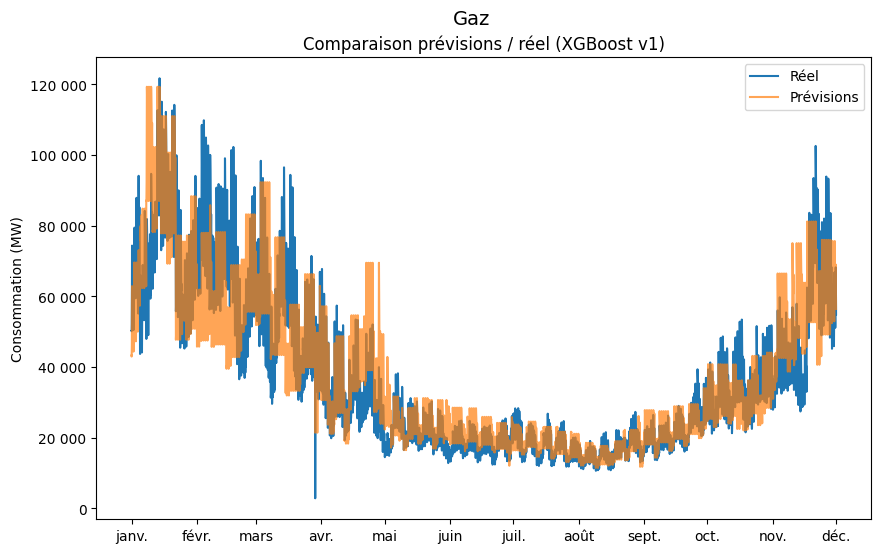

In [112]:
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df_verif_gaz_v1,
    x = (df_verif_gaz_v1.index),
    y = 'con_bru_gaz_tot',
    zorder = 1,
    label = 'Réel'
)
sns.lineplot(
    data=df_verif_gaz_v1,
    x = df_verif_gaz_v1.index,
    y = 'y_pred',
    zorder = 2,
    alpha = 0.7,
    label = 'Prévisions'
)

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

ax.yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, pos: f"{int(x):,}".replace(",", " "))
)

plt.suptitle('Gaz', fontsize=14, y= 0.96)
plt.title('Comparaison prévisions / réel (XGBoost v1)')
plt.ylabel("Consommation (MW)")
plt.xlabel('')
plt.show()

In [113]:
rmse_ele_v1, mae_ele_v1, r2_ele_v1, importances_ele_v1, df_verif_ele_v1 = test_model(
    df_ele.loc[df_ele['year']>=2019], features, '01/01/2025', 'xgboost'
)

In [ ]:
print('\nElectricité - Résultats de la première modélisation')
print(f"RMSE: {rmse_ele_v1:.2f}")
print(f"MAE: {mae_ele_v1:.2f}")
print(f"R²: {r2_ele_v1:.2f}\n")
print('Electricité - Importance des variables')
print(importances_ele_v1)


Electricité - Résultats de la première modélisation
RMSE: 3529.84
MAE: 2663.03
R²: 0.89

Electricité - Importance des variables
month_name           0.520
is_weekend           0.090
heu_cos              0.082
heu_sin              0.059
vac_de_noe           0.057
vac_d_hiv            0.047
top_fer              0.035
week_of_month_sin    0.032
vac_de_pri           0.031
vac_de_la_tou        0.027
week_of_month_cos    0.015
vac_d_ete            0.006
dtype: float32


In [192]:
df_verif_ele_v1['ecart'] = abs((df_verif_ele_v1['y_pred']-df_verif_ele_v1['con_bru_ele_rte']) *100 / df_verif_ele_v1['con_bru_ele_rte'])
df_verif_ele_v1['ecart'].mean()

np.float64(5.311293865877115)

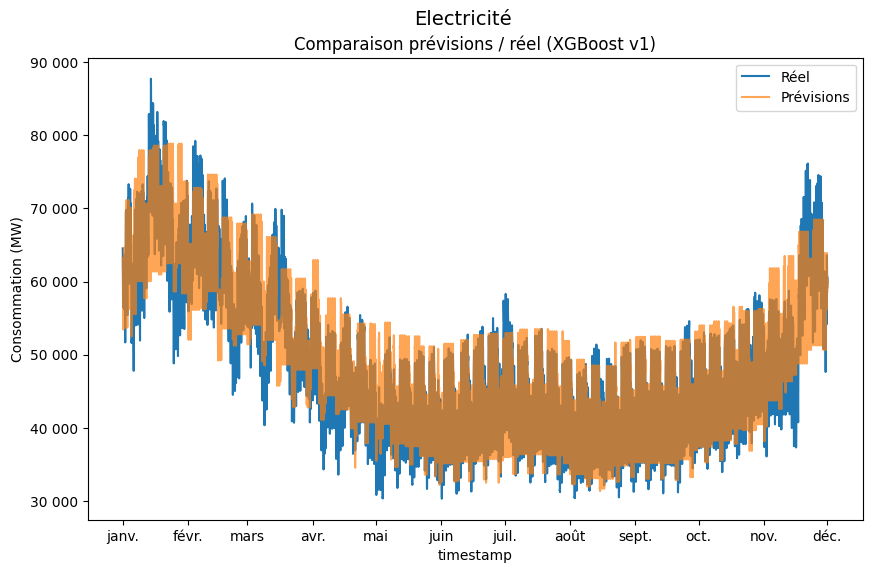

In [115]:
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df_verif_ele_v1,
    x = (df_verif_ele_v1.index),
    y = 'con_bru_ele_rte',
    zorder = 1,
    label = 'Réel'
)
sns.lineplot(
    data=df_verif_ele_v1,
    x = df_verif_ele_v1.index,
    y = 'y_pred',
    zorder = 2,
    alpha = 0.7,
    label = 'Prévisions'
)

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

ax.yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, pos: f"{int(x):,}".replace(",", " "))
)


plt.suptitle('Electricité', fontsize=14, y= 0.96)
plt.title('Comparaison prévisions / réel (XGBoost v1)')
plt.ylabel("Consommation (MW)")

plt.show()

### XGBoost v2
Recherche des meilleurs hyperparamètres

In [162]:
param_grid = {
    'learning_rate': [0.03, 0.05, 0.1],
    'n_estimators': [300, 600, 900],
}

In [163]:
rmse_gaz_v2, mae_gaz_v2, r2_gaz_v2, df_verif_gaz_v2, best_params_gaz = search_params(
    df_gaz.loc[df_gaz['year']>=2024], features, '01/01/2025', 'xgboost', param_grid
)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


In [164]:
best_params_gaz

{'learning_rate': 0.03, 'n_estimators': 300}

In [171]:
param_grid = {
    'learning_rate': [0.03, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
}

In [172]:
rmse_ele_v2, mae_ele_v2, r2_ele_v2, df_verif_ele_v2, best_params_ele = search_params(
    df_ele.loc[df_ele['year']>=2019], features, '01/01/2025', 'xgboost', param_grid
)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


In [173]:
best_params_ele

{'learning_rate': 0.03, 'n_estimators': 100}

### XGBoost final

In [179]:
rmse, mae, r2, importances, df_verif = test_model(
    df_gaz.loc[df_gaz['year']>=2024], features, '01/01/2025', 'xgboost', params=best_params_gaz
)

In [180]:
print('XGBoost v3 - version finale')
print('Gaz - Métriques finales')
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.2f}\n")
print('Gaz - Importance des variables')
print(importances)

XGBoost v3 - version finale
Gaz - Métriques finales
RMSE: 9375.47
MAE: 6197.78
R²: 0.83

Gaz - Importance des variables
month_name           0.643
week_of_month_cos    0.104
vac_d_hiv            0.043
heu_cos              0.042
is_weekend           0.029
week_of_month_sin    0.025
vac_d_ete            0.025
vac_de_la_tou        0.024
top_fer              0.023
heu_sin              0.020
vac_de_pri           0.016
vac_de_noe           0.005
dtype: float32


In [186]:
df_verif['ecart'] = abs((df_verif['y_pred']-df_verif['con_bru_gaz_tot']) *100 / df_verif['con_bru_gaz_tot'])
df_verif['ecart'].mean()

np.float64(16.27402070567861)

In [176]:
rmse_ele, mae_ele, r2_ele, importances_ele, df_verif_ele = test_model(
    df_ele.loc[df_ele['year']>=2024], features, '01/01/2025', 'xgboost', params=best_params_gaz
)

In [178]:
print('XGBoost v3 - version finale')
print('Electricité - Métriques finales')
print(f"RMSE: {rmse_ele:.2f}")
print(f"MAE: {mae_ele:.2f}")
print(f"R²: {r2_ele:.2f}\n")
print('Electricité - Importance des variables')
print(importances_ele)

XGBoost v3 - version finale
Electricité - Métriques finales
RMSE: 4158.57
MAE: 2945.75
R²: 0.84

Electricité - Importance des variables
month_name           0.420
week_of_month_cos    0.106
is_weekend           0.102
heu_cos              0.101
vac_d_hiv            0.081
heu_sin              0.072
top_fer              0.059
week_of_month_sin    0.024
vac_de_la_tou        0.012
vac_de_pri           0.010
vac_de_noe           0.008
vac_d_ete            0.005
dtype: float32


In [190]:
df_verif_ele['ecart'] = abs((df_verif_ele['y_pred']-df_verif_ele['con_bru_ele_rte']) *100 / df_verif_ele['con_bru_ele_rte'])
df_verif_ele['ecart'].mean()

np.float64(5.654410055869388)

In [191]:
df_verif_ele


,con_bru_ele_rte,y_pred,ecart
timestamp,,,
2025-01-01 00:00:00,64532.0,54515.175781,15.522259
2025-01-01 00:30:00,62502.0,52497.847656,16.006132
2025-01-01 01:00:00,62251.0,52435.027344,15.768377
2025-01-01 01:30:00,61812.0,52295.718750,15.395524
2025-01-01 02:00:00,61776.0,52179.921875,15.533667
...,...,...,...
2025-11-30 21:30:00,59074.0,56620.210938,4.153755
2025-11-30 22:00:00,59505.0,57411.218750,3.518664
2025-11-30 22:30:00,60654.0,58240.945312,3.978393
